In [1]:
import sys
sys.path.insert(0, "../..")

import numpy as np
import scipy.signal
from matplotlib import pyplot as plt
plt.style.use('seaborn')

from module.base.network import Network
from module.simulation.meanfield import MeanField
from module.simulation.quick_meanfield2 import QuickMeanField2
import module.components.CONST as CONST
def set_size(width = "thesis", fraction=1, subplots=(1, 1)):
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**0.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

/tmp/ipykernel_280/1067228103.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
def get_data(w):
    w = np.floor(2 * w) / 2
    dt = 1/w * 2 * np.pi / 250
    ts = np.loadtxt("../../data/time_dep/oscil/ts_w="+str(w)+".csv")

    N = ts.shape[0]
    n = int(N/2)
    ts = ts[n:]

    Us = np.loadtxt("../../data/time_dep/oscil/Us_w="+str(w)+".csv")[n:]

    #MF1
    mf_currents = np.loadtxt("../../data/time_dep/oscil/mf_currents_w="+str(w)+".csv")[n:]
    mf_means = np.loadtxt("../../data/time_dep/oscil/mf_means_w="+str(w)+".csv")[n:]

    #MF2
    qmf2_currents = np.loadtxt("../../data/time_dep/oscil/qmf2_currents_w="+str(w)+".csv")[n:]
    qmf2_means = np.loadtxt("../../data/time_dep/oscil/qmf2_means_w="+str(w)+".csv")[n:]
    qmf2_vars = np.loadtxt("../../data/time_dep/oscil/qmf2_vars_w="+str(w)+".csv")[n:]

    return ((ts, Us, w, dt), (mf_means, mf_currents), (qmf2_means, qmf2_vars, qmf2_currents))

## Analysis

In [7]:
(ts, Us, w, dt), (mf_means, mf_currents), (qmf2_means, qmf2_vars, qmf2_currents) = get_data(2)

## Time Plots

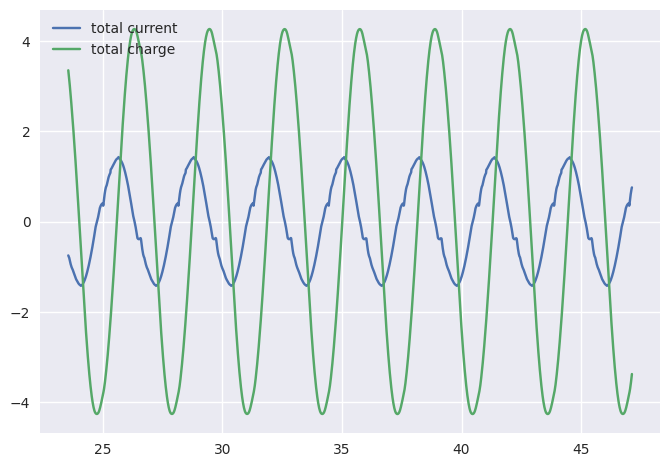

In [8]:
plt.plot(ts, np.sum(qmf2_currents, axis = 1), label = "total current")
plt.plot(ts, np.sum(qmf2_means, axis = 1), label = "total charge")

plt.legend()

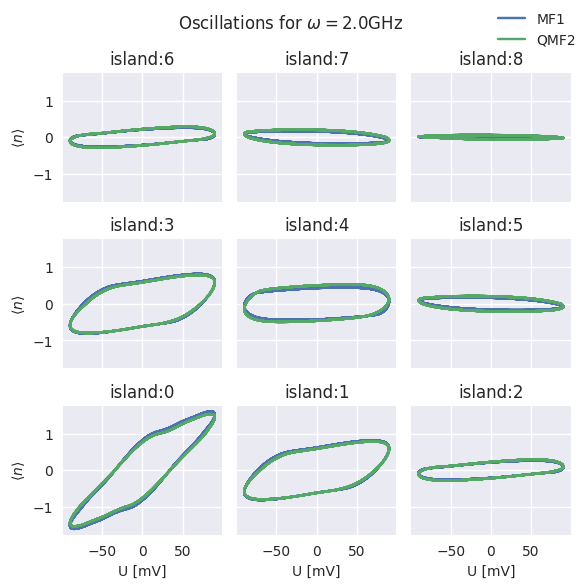

In [25]:
f, axs = plt.subplots(3, 3, figsize=(set_size()[0], set_size()[0]), sharex=True, sharey=True)

for i in range(3):
    for j in range(3):
        if i==0 and j ==0:
            axs[2-j,i].plot(Us*1000, mf_means[:, i+3*j], label = "MF1")
            axs[2-j,i].plot(Us*1000, qmf2_means[:, i + 3*j], label = "QMF2")
            axs[2-j,i].set_title("island:"+ str(i+3*j))
        else:
            axs[2-j,i].plot(Us*1000, mf_means[:, i+3*j])
            axs[2-j,i].plot(Us*1000, qmf2_means[:, i + 3*j])
            axs[2-j,i].set_title("island:"+ str(i+3*j))


axs[2,0].set_xlabel("U [mV]")
axs[2,1].set_xlabel("U [mV]")
axs[2,2].set_xlabel("U [mV]")
axs[0,0].set_ylabel("$\\langle n \\rangle$")
axs[1,0].set_ylabel("$\\langle n \\rangle$")
axs[2,0].set_ylabel("$\\langle n \\rangle$")
f.legend()
f.suptitle("Oscillations for $\\omega = "+str(w)+"$GHz")
f.tight_layout()
plt.savefig("../../output/time_dependence/means.pdf")


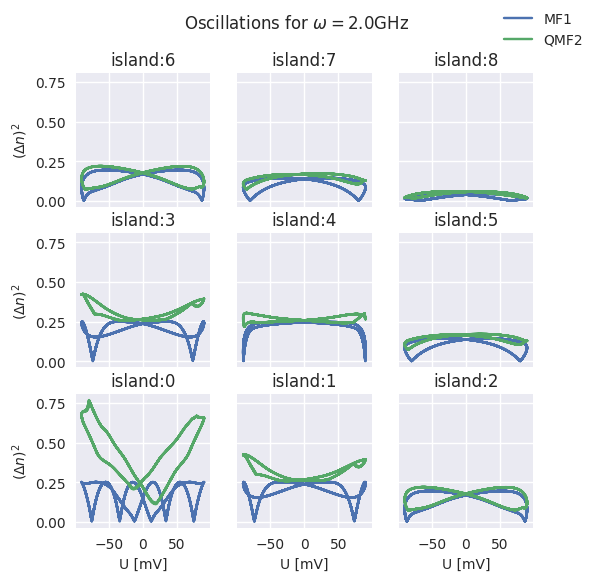

In [26]:
f, axs = plt.subplots(3, 3, figsize=(set_size()[0], set_size()[0]), sharex=True, sharey=True)

for i in range(3):
    for j in range(3):
        if i==0 and j ==0:
            d = mf_means[:, i+3*j] - np.floor(mf_means[:, i+3*j])
            axs[2-j,i].plot(Us*1000, d * (1 - d), label = "MF1")
            axs[2-j,i].plot(Us*1000, qmf2_vars[:, i + 3*j], label = "QMF2")
            axs[2-j,i].set_title("island:"+ str(i+3*j))
        else:
            d = mf_means[:, i+3*j] - np.floor(mf_means[:, i+3*j])
            axs[2-j,i].plot(Us*1000, d * (1 - d))
            axs[2-j,i].plot(Us*1000, qmf2_vars[:, i + 3*j])
            axs[2-j,i].set_title("island:"+ str(i+3*j))


axs[2,0].set_xlabel("U [mV]")
axs[2,1].set_xlabel("U [mV]")
axs[2,2].set_xlabel("U [mV]")
axs[0,0].set_ylabel("$(\\Delta n)^2$")
axs[1,0].set_ylabel("$(\\Delta n)^2$")
axs[2,0].set_ylabel("$(\\Delta n)^2$")
f.legend()
f.suptitle("Oscillations for $\\omega = "+str(w)+"$GHz")

plt.savefig("../../output/time_dependence/vars.pdf")


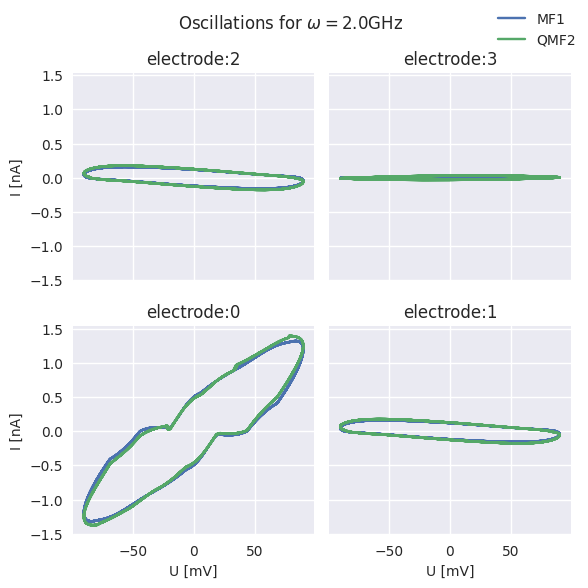

In [27]:
f, axs = plt.subplots(2, 2, figsize=(set_size()[0], set_size()[0]), sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        if i==0 and j ==0:
            axs[1-j,i].plot(Us*1000, mf_currents[:, i+2*j], label = "MF1")
            axs[1-j,i].plot(Us*1000, qmf2_currents[:, i + 2*j], label = "QMF2")
            axs[1-j,i].set_title("electrode:"+ str(i+2*j))
        else:
            axs[1-j,i].plot(Us*1000, mf_currents[:, i+2*j])
            axs[1-j,i].plot(Us*1000, qmf2_currents[:, i + 2*j])
            axs[1-j,i].set_title("electrode:"+ str(i+2*j))


axs[1,0].set_xlabel("U [mV]")
axs[1,1].set_xlabel("U [mV]")
axs[0,0].set_ylabel("I [nA]")
axs[1,0].set_ylabel("I [nA]")
f.legend()
f.suptitle("Oscillations for $\\omega = "+str(w)+"$GHz")
f.tight_layout()

plt.savefig("../../output/time_dependence/currents.pdf")


## Frequency Dependency

In [28]:
ws = []
mean_var = []
mean_abs_currents = []

for i in range(1, 79):
    w = i/2
    ws.append(w)

    (ts, Us, w, dt), (mf_means, mf_currents), (qmf2_means, qmf2_vars, qmf2_currents) = get_data(w)

    mean_var.append(np.mean(qmf2_vars, axis = 0))
    mean_abs_currents.append(np.mean(np.abs(qmf2_currents), axis = 0))

In [29]:
mean_var = np.array(mean_var)
mean_abs_currents = np.array(mean_abs_currents)

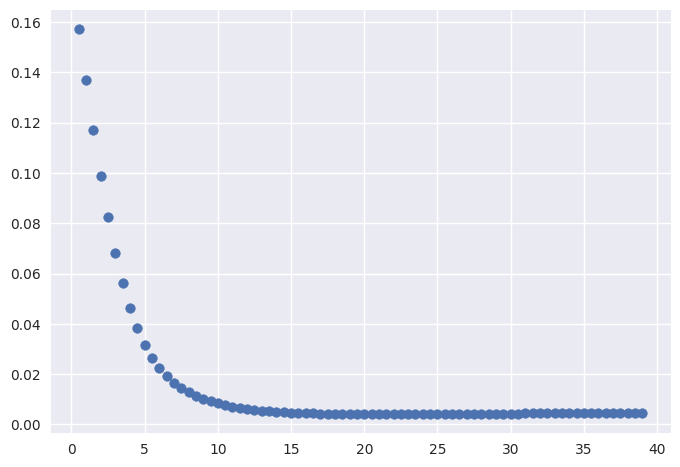

In [30]:
plt.scatter(ws, mean_abs_currents[:, 2])

## Fourier Analysis

In [3]:
def fft(signal):
    n_0 = int(signal.shape[-1] / 2)
    signal_fft = np.fft.fft(signal)
    freq = np.fft.fftfreq(signal.shape[-1]) / dt * 2 * np.pi

    return freq[0:n_0], signal_fft[0:n_0]

def fft_amp(signal):
    n_0 = int(signal.shape[-1] / 2)
    signal_fft = np.fft.fft(signal)
    freq = np.fft.fftfreq(signal.shape[-1]) / dt * 2 * np.pi

    return freq[0:n_0], np.abs(signal_fft[0:n_0])

def fft_phase(signal):
    n_0 = int(signal.shape[-1] / 2)
    signal_fft = np.fft.fft(signal)
    freq = np.fft.fftfreq(signal.shape[-1]) / dt * 2 * np.pi

    return freq[0:n_0], np.angle(signal_fft[0:n_0])

## Phase Analysis

In [32]:
ws = []
qmf2_phases = []
mf_phases = []

In [33]:
for i in range(1, 79):
    w = i/2
    ws.append(w)

    (ts, Us, w, dt), (mf_means, mf_currents), (qmf2_means, qmf2_vars, qmf2_currents) = get_data(w)
    bm = scipy.signal.windows.hann(len(ts))
    freq, U_fft = fft(Us * bm)
    U_amp = np.abs(U_fft)
    U_phase = np.angle(U_fft)

    current = 3

    freq, qmf2_current_fft = fft(qmf2_currents[:, current] * bm)
    qmf2_current_amp = np.abs(qmf2_current_fft)
    qmf2_current_phase = np.angle(qmf2_current_fft)

    freq, mf_current_fft = fft(mf_currents[:, current] * bm)
    mf_current_amp = np.abs(mf_current_fft)
    mf_current_phase = np.angle(mf_current_fft)
    
    qmf2_phases.append(qmf2_current_phase[np.argmax(U_amp)])
    mf_phases.append(mf_current_phase[np.argmax(U_amp)])

In [34]:
qmf2_phases = np.array(qmf2_phases)
mf_phases = np.array(mf_phases)

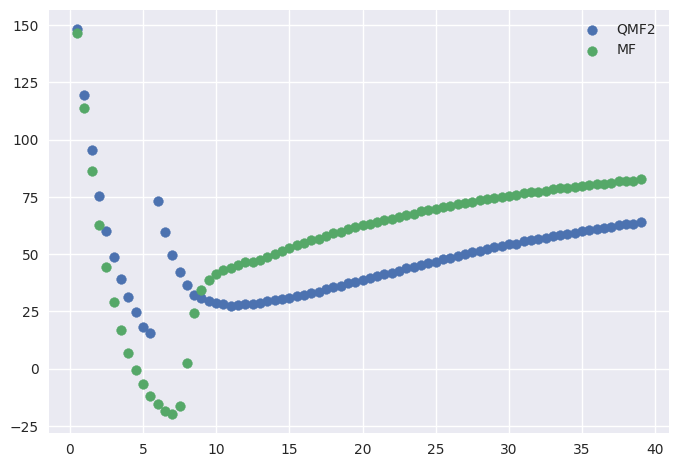

In [35]:
plt.scatter(ws, qmf2_phases / np.pi * 180, label = "QMF2")
plt.scatter(ws, mf_phases / np.pi * 180, label = "MF")

plt.legend()

In [36]:
(ts, Us, w, dt), (mf_means, mf_currents), (qmf2_means, qmf2_vars, qmf2_currents) = get_data(18)

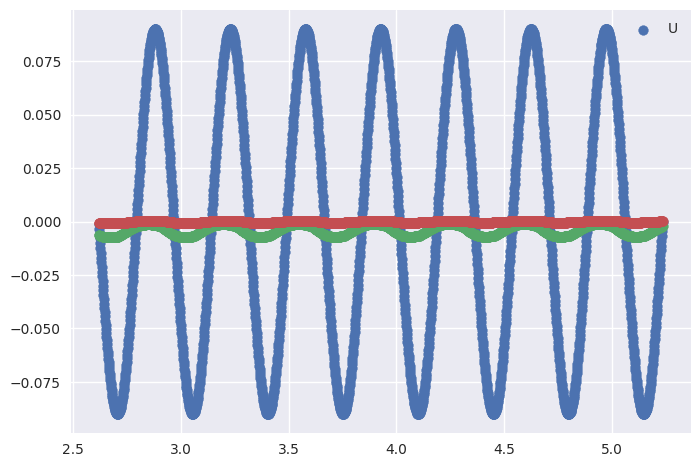

In [37]:
plt.scatter(ts, Us, label = "U")
plt.scatter(ts, qmf2_currents[:, 1])
plt.scatter(ts, mf_currents[:, 1])

plt.legend()

## Amplitude

In [4]:
# (ts, Us, w, dt), (mf_means, mf_currents), (qmf2_means, qmf2_vars, qmf2_currents) = get_data(25)
net = Network(3,3,1,[[0,0,0],[2,0,0],[0,2,0],[2,2,0]])

In [5]:
1/2/np.pi/w

NameError: name 'w' is not defined

In [6]:
w = 8
N_oscil = 10

t_max = 60
dt = 0.01
N = int(t_max / dt)
ts = np.linspace(0, t_max, N)    # nanoseconds
U_in = np.sin(w * ts) * 0.09

name_str = "_w="+str(w)

print("w =", w)
print("N =", N)
print("dt =", dt)

w = 8
N = 6000
dt = 0.01


In [7]:
freq, amp = fft(U_in)

In [8]:
np.diff(freq)

array([0.10471976, 0.10471976, 0.10471976, ..., 0.10471976, 0.10471976,
       0.10471976])

In [9]:
mf = MeanField(net)
mf_means = np.zeros((N, 9))
mf_currents = np.zeros((N, 4))
means = np.zeros((9))
for i in range(N):
    net.set_voltage_config([U_in[i], 0, 0, 0], 0)
    means = mf.numeric_integration_solve(macrostate = means, N = 1, dt = dt)
    mf_means[i] = np.copy(means)

    mf_currents[i, 0] = mf.calc_expected_electrode_rates(means, 0) * CONST.electron_charge
    mf_currents[i, 1] = mf.calc_expected_electrode_rates(means, 1) * CONST.electron_charge
    mf_currents[i, 2] = mf.calc_expected_electrode_rates(means, 2) * CONST.electron_charge
    mf_currents[i, 3] = mf.calc_expected_electrode_rates(means, 3) * CONST.electron_charge


qmf2 = QuickMeanField2(net)
qmf2_means = np.zeros((N, 9))
qmf2_vars = np.zeros((N, 9))
qmf2_currents = np.zeros((N, 4))
for i in range(N):
    net.set_voltage_config([U_in[i], 0, 0, 0], 0)
    qmf2.numeric_integration_solve(N = 1, dt = dt, reset = False)
    qmf2_means[i] = np.copy(qmf2.means)
    qmf2_vars[i] = np.copy(qmf2.vars)

    qmf2_currents[i, 0] = qmf2.calc_expected_electrode_current(0)
    qmf2_currents[i, 1] = qmf2.calc_expected_electrode_current(1)
    qmf2_currents[i, 2] = qmf2.calc_expected_electrode_current(2)
    qmf2_currents[i, 3] = qmf2.calc_expected_electrode_current(3)

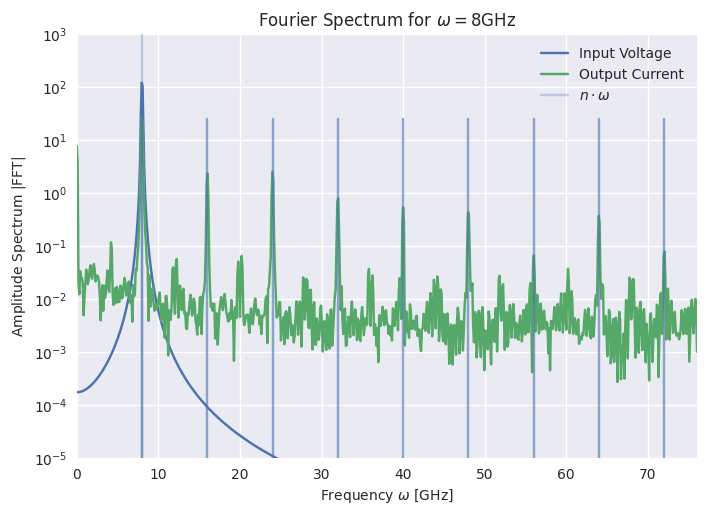

In [45]:
bm = scipy.signal.windows.hann(len(ts))
freq, U_fft = fft(U_in * bm)
U_amp = np.abs(U_fft)
U_phase = np.angle(U_fft)

current = 1

freq, qmf2_current_fft = fft(qmf2_currents[:, current] * bm)
qmf2_current_amp = np.abs(qmf2_current_fft)
qmf2_current_phase = np.angle(qmf2_current_fft)

freq, mf_current_fft = fft(mf_currents[:, current] * bm)
mf_current_amp = np.abs(mf_current_fft)
mf_current_phase = np.angle(mf_current_fft)


plt.plot(freq, U_amp, label = "Input Voltage")
#plt.plot(freq, mf_current_amp, label = "MF1")
plt.plot(freq, qmf2_current_amp, label = "Output Current")

plt.axvline(w, alpha = 0.3, label = "$n \\cdot \\omega$")
for i in range(1, 50):
    plt.axvline(i*w, alpha = 0.6, ymin = 0, ymax = 0.8)



plt.legend()
plt.yscale("log")

plt.xlabel("Frequency $\\omega$ [GHz]")
plt.ylabel("$|\widetilde f(\\omega)|^2$")
plt.ylabel("Amplitude Spectrum $|\\mathrm{FFT}|$")

plt.xlim(0, 9.5 * w)
plt.ylim(1e-5, 1e3)

plt.title("Fourier Spectrum for $\\omega = "+str(w)+"$GHz")
plt.savefig("../../output/time_dependence/fourier.pdf")

In [150]:
U_in.shape

(6000,)

In [151]:
np.diff(freq)

array([0.10471976, 0.10471976, 0.10471976, ..., 0.10471976, 0.10471976,
       0.10471976])

In [70]:
N

5599

In [71]:
len(freq)

2799

In [72]:
dt

0.0009817477042468104

In [73]:
freq

array([0.00000000e+00, 1.14306126e+00, 2.28612252e+00, ...,
       3.19599929e+03, 3.19714235e+03, 3.19828541e+03])